### Objective:

To manually generate embeddings for a set of articles which are part of the mongo db to kick start the clustering process

In [1]:
parent_folder = '/Users/ravi.tej/Desktop/ML/Recommendations/cambrian/'
data_folder = parent_folder + 'data/'
from hydra import compose, initialize
with initialize(config_path="../../conf"):
    # Compose the configuration
    cfg = compose(config_name="TopicClusterMapping.yaml")

import os

import xml.etree.ElementTree as ET

tree = ET.parse('../../conf/application.run.xml')
root = tree.getroot()

envs_element = root.find('./configuration/envs')
for variable in envs_element.findall('env'):
    name = variable.get('name')
    value = variable.get('value')
    os.environ[name] = value

/var/folders/d4/cgyr_gnj7nn2wy_hq40gkq8c0000gq/T/ipykernel_6455/4032682437.py:4: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize(config_path="../../conf"):


In [2]:
import sys

sys.path.append('/Users/ravi.tej/Desktop/ML/Recommendations/cambrian/')

from src.embeddings.EmbeddingsService import EmbeddingsService
from sql.embeddings.EmbeddingSQL import EmbeddingSQL

import json

In [3]:
with open(data_folder + 'insight_db_articles.json', 'rb') as f:
    articles = json.load(f)

In [4]:
article_ids = []
for article in articles:
    article_ids.append(article['_id']['$oid'])

In [5]:
article_ids

['65138887395f46458f8bba7f',
 '651388a4395f46458f8bbaa4',
 '6512ce9c395f46458f8bb739',
 '6512ce9a395f46458f8bb737',
 '651388b5395f46458f8bbacb',
 '651388ef395f46458f8bbb10',
 '65138848395f46458f8bb9f5',
 '65138861395f46458f8bba35',
 '651388a4395f46458f8bbaa5',
 '6513885d395f46458f8bba2f',
 '65138b74395f46458f8bbf36',
 '65138843395f46458f8bb9e8',
 '651388ac395f46458f8bbab4',
 '65138855395f46458f8bba18',
 '65138863395f46458f8bba37',
 '6513884c395f46458f8bba02',
 '651388b0395f46458f8bbabe',
 '6513884e395f46458f8bba03',
 '651388a9395f46458f8bbab0',
 '6513884e395f46458f8bba04',
 '65138ba0395f46458f8bbf86',
 '65138866395f46458f8bba3f',
 '65138865395f46458f8bba3d',
 '6512e9bd395f46458f8bb761',
 '651388bd395f46458f8bbad8',
 '65138870395f46458f8bba52',
 '6513884f395f46458f8bba07',
 '65138888395f46458f8bba81',
 '6513892c395f46458f8bbb62',
 '6513889d395f46458f8bba9c',
 '651388be395f46458f8bbada',
 '6512cdf3395f46458f8bb721',
 '65138857395f46458f8bba1e',
 '651388f4395f46458f8bbb15',
 '6513887a395f

In [7]:
computed_embeddings = EmbeddingSQL.get_article_ids_with_embeddings()

In [9]:
pending_articles = [x for x in article_ids if x not in computed_embeddings]

In [11]:
len(pending_articles)

1104

In [3]:
emb = EmbeddingsService(hf_model_path='BAAI/bge-small-en')

In [13]:
from tqdm.notebook import tqdm

In [4]:
%timeit emb.create_article_embeddings('651dacc4701055199ecf995e')

728 ms ± 15.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
50000/3600

13.88888888888889

In [14]:
for article_id in tqdm(pending_articles):
    emb.create_article_embeddings(article_id)

  0%|          | 0/1104 [00:00<?, ?it/s]

In [ ]:
emb.

In [7]:
from src.embeddings._utils import __get_article_text_from_s3,get_article_metadata_from_api, get_cleaned_article_content

In [25]:
%timeit get_article_metadata_from_api('651dacc4701055199ecf995e')

68.5 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
50000 * 0.0685/60

57.08333333333334

In [13]:
import requests

In [20]:
url = f"http://insight-user-app-beta-env.eba-rnrpvmin.ap-south-1.elasticbeanstalk.com/articles/651dacc4701055199ecf995e?fetchSourceInfo=true"

In [21]:
r = requests.get(url)

In [22]:
import json

In [23]:
json.loads(r.text)

{'articleId': '651dacc4701055199ecf995e',
 'url': 'https://economictimes.indiatimes.com/news/international/us/billboard-latin-music-week-2023-yng-lvcas-peso-pluma-and-grupo-frontera-mark-presence-heres-what-you-may-want-to-know/articleshow/104140976.cms',
 'title': 'Billboard Latin Music Week 2023: Yng Lvcas, Peso Pluma and Grupo Frontera mark presence. Here’s what you m',
 'shortDescription': 'Peso Pluma, Yng Lvcas and Grupo Frontera, at the Billboard Latin Music Week 2023, discussed their collaborative efforts in fueling the Mexican music revolution. They emphasized unity within the industry and highlighted their global hits, including  La Bebe (Remix)  and  Tulum.  ',
 'publishedTime': '2023-10-04T01:43:00+05:30',
 'lastUpdatedTime': '2023-10-04T01:43:00+05:30',
 'tags': ['latin music week',
  'Mexican Music',
  'peso',
  'Billboard Latin Music Week 2023',
  'Billboard Latin Music Week',
  'Billboard Latin Music',
  'yng lvcas',
  'peso pluma',
  'grupo frontera'],
 'articleImageUrl

In [19]:
get_article_metadata_from_api('651dacc4701055199ecf995e')

{'articleId': '651dacc4701055199ecf995e',
 'url': 'https://economictimes.indiatimes.com/news/international/us/billboard-latin-music-week-2023-yng-lvcas-peso-pluma-and-grupo-frontera-mark-presence-heres-what-you-may-want-to-know/articleshow/104140976.cms',
 'title': 'Billboard Latin Music Week 2023: Yng Lvcas, Peso Pluma and Grupo Frontera mark presence. Here’s what you m',
 'shortDescription': 'Peso Pluma, Yng Lvcas and Grupo Frontera, at the Billboard Latin Music Week 2023, discussed their collaborative efforts in fueling the Mexican music revolution. They emphasized unity within the industry and highlighted their global hits, including  La Bebe (Remix)  and  Tulum.  ',
 'publishedTime': '2023-10-04T01:43:00+05:30',
 'lastUpdatedTime': '2023-10-04T01:43:00+05:30',
 'tags': ['latin music week',
  'Mexican Music',
  'peso',
  'Billboard Latin Music Week 2023',
  'Billboard Latin Music Week',
  'Billboard Latin Music',
  'yng lvcas',
  'peso pluma',
  'grupo frontera'],
 'articleImageUrl

In [12]:
__get_article_text_from_s3('651dacc4701055199ecf995e')

{'meta_data': {'is_premium_article': False,
  'title': 'Billboard Latin Music Week 2023: Yng Lvcas, Peso Pluma and Grupo Frontera mark presence. Here’s what you m',
  'short_description': 'Peso Pluma, Yng Lvcas and Grupo Frontera, at the Billboard Latin Music Week 2023, discussed their collaborative efforts in fueling the Mexican music revolution. They emphasized unity within the industry and highlighted their global hits, including  La Bebe (Remix)  and  Tulum.  ',
  'published_time': '2023-10-04T01:43:00+05:30',
  'last_updated_time': '2023-10-04T01:43:00+05:30',
  'tags': ['latin music week',
   'Mexican Music',
   'peso',
   'Billboard Latin Music Week 2023',
   'Billboard Latin Music Week',
   'Billboard Latin Music',
   'yng lvcas',
   'peso pluma',
   'grupo frontera'],
  'image_url': 'https://economictimes.indiatimes.com/thumb/msid-104141051,width-1548,height-1024,imgsize-49040,overlay-economictimes/photo.jpg',
  'authors': ['The Feed']},
 'cleaned_text': "Peso Pluma, Yng Lvcas

In [19]:
%timeit __get_article_metadata_from_api('65138855395f46458f8bba18')

69.9 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
%timeit __get_article_text_from_s3('65138855395f46458f8bba18')

397 ms ± 17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
import numpy as np

In [44]:
import pandas as pd

In [46]:
from datetime import datetime

In [64]:
# Sample DataFrame with a column of dates
data = {'date_column': ['2023-09-25', '2023-09-26', '2023-09-27', '2022-10-12', '2021-10-06']}
df = pd.DataFrame(data)

# Convert the 'date_column' to datetime objects
df['date_column'] = pd.to_datetime(df['date_column'])

# Get today's date as a datetime object
today = datetime.today()

# Calculate the number of weeks from today and create a new column
df['weeks_from_today'] = (df['date_column'] - today).dt.days//7

In [65]:
df

,date_column,weeks_from_today
0,2023-09-25,-1
1,2023-09-26,-1
2,2023-09-27,-1
3,2022-10-12,-51
4,2021-10-06,-104


In [66]:
df['decay'] = 1.05 ** df['weeks_from_today']

In [69]:
for i, r in df.iterrows():
    print(r['decay'])

0.9523809523809523
0.9523809523809523
0.9523809523809523
0.08305116854512426
0.006256232740780622


In [94]:
df['decay1'] = np.maximum(df['decay'], 0.2)

In [103]:
np.log2(1000)

9.965784284662087

In [95]:
df

,date_column,weeks_from_today,decay,decay1
0,2023-09-25,-1,0.952381,0.952381
1,2023-09-26,-1,0.952381,0.952381
2,2023-09-27,-1,0.952381,0.952381
3,2022-10-12,-51,0.083051,0.200000
4,2021-10-06,-104,0.006256,0.200000


In [74]:
1.25 ** -14

0.04398046511104

In [78]:
sum([1.25**-x for x in range(3)])

2.44

In [80]:
from scipy.stats import beta

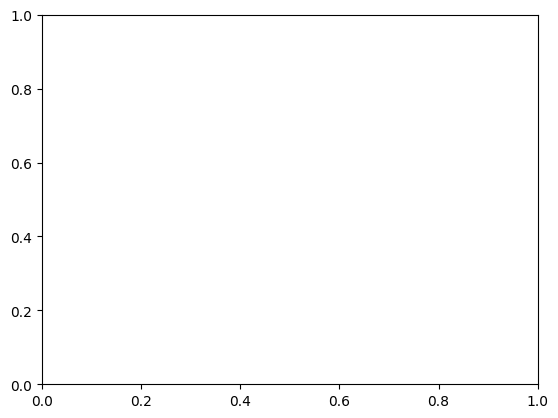

In [86]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [88]:
plt.show()

In [61]:
1.05**-5

0.7835261664684589

In [18]:
__get_article_metadata_from_api('6513889f395f46458f8bba9d')

{'articleId': '6513889f395f46458f8bba9d',
 'url': 'https://economictimes.indiatimes.com/tech/startups/harness-the-power-of-industry-5-0-with-the-latest-sector-focussed-mentorship-cohort-of-accel-3-0/articleshow/103578823.cms',
 'title': 'Harness the power of Industry 5.0 with the latest sector-focussed mentorship cohort of Accel 3.0',
 'shortDescription': 'The Industry 5.0 cohort by Accel Atoms 3.0 is set to ignite the pace of startup innovations in the industrial manufacturing space, with a focus on empowering visionary entrepreneurs with the vision to power the future of manufacturing. Join the sector-focussed mentorship cohort to connect with industry experts, tech specialists, researchers, founders as part of the Accel Atoms Industry 5.0 cohort, and glean actionable insights into the evolving human-tech pivot fuelling innovation.',
 'publishedTime': '2023-09-11T17:01:00+05:30',
 'lastUpdatedTime': '2023-09-11T17:01:00+05:30',
 'tags': ['accel',
  'Industry 5.0',
  'Internet of Thin

In [18]:
__get_article_text_from_s3('6513889f395f46458f8bba9d')

{'meta_data': {'is_premium_article': True,
  'title': 'Harness the power of Industry 5.0 with the latest sector-focussed mentorship cohort of Accel 3.0',
  'short_description': 'The Industry 5.0 cohort by Accel Atoms 3.0 is set to ignite the pace of startup innovations in the industrial manufacturing space, with a focus on empowering visionary entrepreneurs with the vision to power the future of manufacturing. Join the sector-focussed mentorship cohort to connect with industry experts, tech specialists, researchers, founders as part of the Accel Atoms Industry 5.0 cohort, and glean actionable insights into the evolving human-tech pivot fuelling innovation.',
  'published_time': '2023-09-11T17:01:00+05:30',
  'last_updated_time': '2023-09-11T17:01:00+05:30',
  'tags': ['accel',
   'Industry 5.0',
   'Internet of Things',
   'Accel 3.0',
   'Accel industry',
   'industry plans'],
  'image_url': 'https://economictimes.indiatimes.com/thumb/msid-103578907,width-1200,height-900,imgsize-23320